<a href="https://colab.research.google.com/github/JayellWolfe/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/homicide_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#If you quit now...you will end up right back where you first began. And when you were here, 
#you were desperate to be where you are RIGHT NOW .....KEEP GOING !!

In [2]:
from google.colab import files #call up the file
uploaded = files.upload() 

Saving database.csv to database.csv


In [0]:
import matplotlib.pyplot as plt
import numpy as np #linear algebra
import pandas as pd #data processing, read csv file
import seaborn as sns # visualization

In [124]:
database_df = pd.read_csv('database.csv') #read in file
database_df = (database_df.drop(['Record ID', 'Agency Code','Victim Ethnicity','Perpetrator Ethnicity',
                                 'Record Source'],axis=1))
hdata.head() #show table

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,perpAgeAsInt
52,53,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,1,Murder or Manslaughter,Yes,Male,23,Black,Not Hispanic,Male,32,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI,32
54,55,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,3,Murder or Manslaughter,Yes,Male,33,Black,Not Hispanic,Male,26,Black,Not Hispanic,Acquaintance,Handgun,0,1,FBI,26
63,64,AL00101,Bessemer,Municipal Police,Jefferson,Alabama,1980,March,1,Murder or Manslaughter,Yes,Female,35,Black,Not Hispanic,Male,38,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI,38
67,68,AL00101,Bessemer,Municipal Police,Jefferson,Alabama,1980,June,1,Murder or Manslaughter,Yes,Male,54,Black,Not Hispanic,Male,28,Black,Not Hispanic,Acquaintance,Shotgun,0,0,FBI,28
70,71,AL00101,Bessemer,Municipal Police,Jefferson,Alabama,1980,July,2,Murder or Manslaughter,Yes,Male,33,Black,Not Hispanic,Male,65,Black,Not Hispanic,Acquaintance,Knife,0,0,FBI,65


In [0]:
sns.set_style('whitegrid') #setting the theme

In [126]:
!pip install plotly_express

In [127]:
database_df.isna().sum()

Agency Name          0
Agency Type          0
City                 0
State                0
Year                 0
Month                0
Incident             0
Crime Type           0
Crime Solved         0
Victim Sex           0
Victim Age           0
Victim Race          0
Perpetrator Sex      0
Perpetrator Age      0
Perpetrator Race     0
Relationship         0
Weapon               0
Victim Count         0
Perpetrator Count    0
dtype: int64

In [128]:
database_df.shape

(638454, 19)

In [129]:
database_df.dtypes

Agency Name          object
Agency Type          object
City                 object
State                object
Year                  int64
Month                object
Incident              int64
Crime Type           object
Crime Solved         object
Victim Sex           object
Victim Age            int64
Victim Race          object
Perpetrator Sex      object
Perpetrator Age      object
Perpetrator Race     object
Relationship         object
Weapon               object
Victim Count          int64
Perpetrator Count     int64
dtype: object

In [131]:
database_df.head()

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
2,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,0
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
4,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,1


In [132]:
database_df.tail()

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
638449,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Unknown,0,Unknown,Unknown,Handgun,0,0
638450,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Male,57,White,Acquaintance,Handgun,0,0
638451,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation,0,0
638452,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Male,31,White,Stranger,Knife,0,1
638453,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,White,Female,24,White,Daughter,Blunt Object,0,1


In [137]:
#filter out records of killings by family member, as serial killers are more likely to target people they are not related to.

database_df = database_df[(database_df['Relationship']=='Stranger')|(database_df['Relationship']=='Unknown')|(database_df['Relationship']=='Acquaintance')|(hdata['Relationship']=='Neighbor')]
database_df.head()

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
2,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,0
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
4,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,1


In [138]:
database_df = database_df[(database_df['Victim Race']!='Unknown')&(database_df['Victim Ethnicity']!='Unknown')&(database_df['Victim Sex']!='Unknown')]
database_df = database_df[(database_df['Weapon']!='Unknown')]              
np.unique(database_df['Victim Age'])

KeyError: ignored

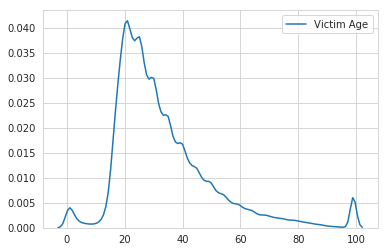

In [142]:
database_df = database_df[database_df['Victim Age']!=998]
sns.kdeplot(database_df['Victim Age'])

In [0]:
#Since there is not likely a serial killer targeting 99 year olds there must be an entry error 
#fix error

database_df = database_df[database_df['Victim Age']!=99]

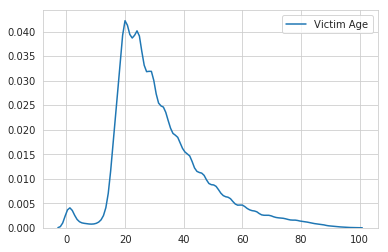

In [152]:
#run again to check error was corrected
database_df = database_df[database_df['Victim Age']!=998]
sns.kdeplot(database_df['Victim Age'])

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad9097fe10>,
      dtype=object)

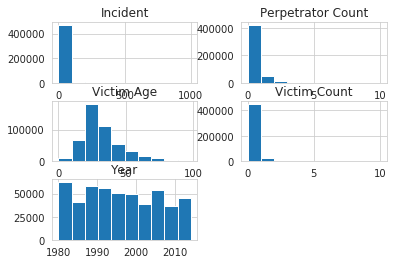

In [154]:
#histogram
database_df.hist()

In [155]:
type(int(database_df['Perpetrator Age'][52]))

int

In [0]:
x = list(database_df['Perpetrator Age'][::])

In [0]:
database_df['perpAgeAsInt'] = x

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D


In [159]:
import matplotlib.pyplot as plt
%pylab inline  
import seaborn as sns
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [161]:
#print(database_df.head())
Victim_Sex = database_df['Victim Sex'].values
Victim_Age = database_df['Victim Age'].values
#Victim_Age = Victim_Age.astype('int16')
Perpetrator_Sex = database_df['Perpetrator Sex'].values
Perpetrator_Age = database_df['Perpetrator Age'].values
#Perpetrator_Age = Perpetrator_Age.astype('int16')
Relationship = database_df['Relationship'].values
Weapon = database_df['Weapon'].values
Solved = database_df['Crime Solved'].values
V_Race = database_df['Victim Race'].values
P_Race = database_df['Perpetrator Race'].values
Crime_Type = database_df['Crime Type'].values
Agency_Name = database_df['Agency Name'].values
Agency_Type = database_df['Agency Type'].values
P_Count =  database_df['Perpetrator Count'].values
City =  database_df['City'].values
State =  database_df['State'].values
Year =  database_df['Year'].values
Month =  database_df['Month'].values
Rel_Category = database_df['Relationship'].values
W_Category = database_df['Weapon'].values

homicide = pd.DataFrame(np.column_stack((Victim_Sex,Victim_Age,Perpetrator_Sex,Perpetrator_Age,
                    Relationship,Weapon,Solved,V_Race,P_Race,Crime_Type,Agency_Name,Agency_Type,
                    Rel_Category,P_Count,City,State,Year,Month,W_Category)))
homicide.columns = ['Victim_Sex','Victim_Age','Perpetrator_Sex','Perpetrator_Age','Relationship',
                    'Weapon','Solved','V_Race','P_Race','Crime_Type','Agency_Name','Agency_Type',
                    'Rel_Category','P_Count','City','State','Year','Month','W_Category']

homicide.loc[(homicide['Relationship'] == 'Wife') | (homicide['Relationship'] == 'Ex-Wife') |
             (homicide['Relationship'] == 'Girlfriend') |
             (homicide['Relationship'] == 'Common-Law Wife'), 'Rel_Category'] = 'Partner-F'

homicide.loc[(homicide['Relationship'] == 'Husband') | (homicide['Relationship'] == 'Ex-Husband') |
             (homicide['Relationship'] == 'Boyfriend') | 
             (homicide['Relationship'] == 'Common-Law Husband'), 'Rel_Category'] = 'Partner-M'

homicide.loc[(homicide['Relationship'] == 'Father') | (homicide['Relationship'] == 'In-Law') |
             (homicide['Relationship'] == 'Mother') | (homicide['Relationship'] == 'Stepfather') |
             (homicide['Relationship'] == 'Stepmother'), 'Rel_Category'] = 'Parent'

homicide.loc[(homicide['Relationship'] == 'Daughter') | (homicide['Relationship'] == 'Son') |
             (homicide['Relationship'] == 'Stepdaughter') | 
             (homicide['Relationship'] == 'Stepson'), 'Rel_Category'] = 'Children'

homicide.loc[(homicide['Relationship'] == 'Brother') | (homicide['Relationship'] == 'Sister'),
             'Rel_Category'] = 'Sibling'

homicide.loc[(homicide['Relationship'] == 'Employee') | (homicide['Relationship'] == 'Employer') ,
             'Rel_Category'] = 'Work'

homicide.loc[(homicide['Relationship'] == 'Boyfriend/Girlfriend') & (homicide['Victim_Sex'] == 'Female'),
             'Rel_Category'] = 'Partner-F'

homicide.loc[(homicide['Relationship'] == 'Boyfriend/Girlfriend') & ((homicide['Victim_Sex'] == 'Male') |
            (homicide['Victim_Sex'] == 'Unknown')) , 'Rel_Category'] = 'Partner-M'

FV_MP = homicide[(homicide.Victim_Sex == 'Female') & (homicide.Perpetrator_Sex == 'Male')]
FV_FP = homicide[(homicide.Victim_Sex == 'Female') & (homicide.Perpetrator_Sex == 'Female')]
MV_MP = homicide[(homicide.Victim_Sex == 'Male') & (homicide.Perpetrator_Sex == 'Male')]
MV_FP = homicide[(homicide.Victim_Sex == 'Male') & (homicide.Perpetrator_Sex == 'Female')]
FV_UP = homicide[(homicide.Victim_Sex == 'Female') & (homicide.Perpetrator_Sex == 'Unknown')]
MV_UP = homicide[(homicide.Victim_Sex == 'Male') & (homicide.Perpetrator_Sex == 'Unknown')]
UV_UP = homicide[(homicide.Victim_Sex == 'Unknown') & (homicide.Perpetrator_Sex == 'Unknown')]

homicide.head(2)

,Victim_Sex,Victim_Age,Perpetrator_Sex,Perpetrator_Age,Relationship,Weapon,Solved,V_Race,P_Race,Crime_Type,Agency_Name,Agency_Type,Rel_Category,P_Count,City,State,Year,Month,W_Category
0,Male,14,Male,15,Acquaintance,Blunt Object,Yes,Native American/Alaska Native,Native American/Alaska Native,Murder or Manslaughter,Anchorage,Municipal Police,Acquaintance,0,Anchorage,Alaska,1980,January,Blunt Object
1,Male,43,Male,42,Acquaintance,Strangulation,Yes,White,White,Murder or Manslaughter,Anchorage,Municipal Police,Acquaintance,0,Anchorage,Alaska,1980,March,Strangulation


In [162]:
pd.crosstab(homicide.Victim_Sex,homicide.Perpetrator_Sex)

Perpetrator_Sex,Female,Male,Unknown
Victim_Sex,,,
Female,4524,39577,31628
Male,11933,249553,152434
Unknown,10,70,140


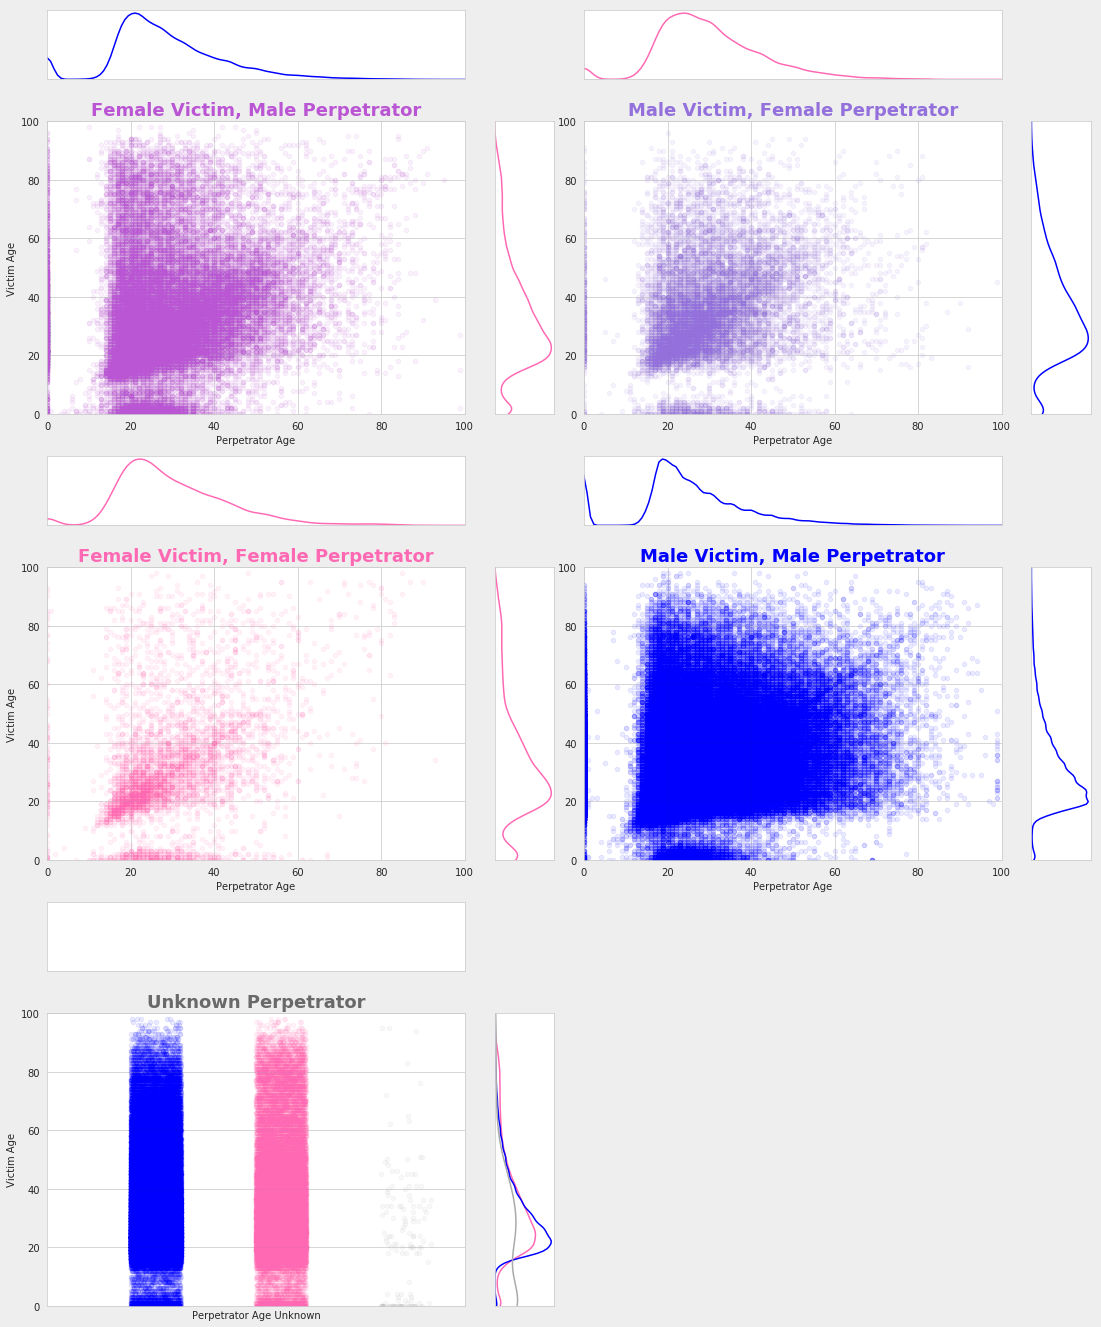

In [163]:
plt.figure(figsize=(10,20),facecolor='#eeeeee')
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.6,wspace=.5)

plt.subplot(12, 12, (1,5))
plt.xlim([0,100])
sns.distplot(FV_MP.Perpetrator_Age,color='blue',hist=False,kde=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (13,41))
plt.title('Female Victim, Male Perpetrator',fontsize=18,fontweight='bold',color='mediumorchid')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter(FV_MP.Perpetrator_Age,FV_MP.Victim_Age, s=20, c='mediumorchid', alpha=0.08)
plt.ylabel('Victim Age')
plt.xlabel('Perpetrator Age')

plt.subplot(12, 12, (18,42))
plt.ylim([0,100])
sns.distplot(FV_MP.Victim_Age,color='hotpink',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (7,11))
plt.xlim([0,100])
sns.distplot(MV_FP.Perpetrator_Age,color='hotpink',hist=False,kde=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (19,47))
plt.title('Male Victim, Female Perpetrator',fontsize=18,fontweight='bold',color='mediumpurple')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter(MV_FP.Perpetrator_Age,MV_FP.Victim_Age, s=20, c='mediumpurple', alpha=0.08)
plt.xlabel('Perpetrator Age')


plt.subplot(12, 12, (24,48))
plt.ylim([0,100])
sns.distplot(MV_FP.Victim_Age,color='blue',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (49,53))
plt.xlim([0,100])
sns.distplot(FV_FP.Perpetrator_Age,color='hotpink',hist=False,kde=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (61,89))
plt.title('Female Victim, Female Perpetrator',fontsize=18,fontweight='bold',color='hotpink')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter(FV_FP.Perpetrator_Age,FV_FP.Victim_Age, s=20, c='hotpink', alpha=0.08)
plt.ylabel('Victim Age')
plt.xlabel('Perpetrator Age')

plt.subplot(12, 12, (66,90))
plt.ylim([0,100])
sns.distplot(FV_FP.Victim_Age,color='hotpink',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])


plt.subplot(12, 12, (55,59))
plt.xlim([0,100])
sns.distplot(MV_MP.Perpetrator_Age,color='blue',hist=False,kde=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (67,95))
plt.title('Male Victim, Male Perpetrator',fontsize=18,fontweight='bold',color='blue')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter(MV_MP.Perpetrator_Age,MV_MP.Victim_Age, s=20, c='blue', alpha=0.08)
plt.xlabel('Perpetrator Age')

plt.subplot(12, 12, (72,96))
plt.ylim([0,100])
sns.distplot(MV_MP.Victim_Age,color='blue',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (97,101))
plt.xlim([0,100])
plt.xlabel('')
plt.xticks([])
plt.yticks([])

MV_UP_j = np.random.random(len(MV_UP)) * 12
FV_UP_j = np.random.random(len(FV_UP)) * 12
UV_UP_j = np.random.random(len(UV_UP)) * 12

plt.subplot(12, 12, (109,137))
plt.title('Unknown Perpetrator',fontsize=18,fontweight='bold',color='dimgrey')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter((MV_UP.Victim_Age*0+20+MV_UP_j),MV_UP.Victim_Age, s=20, c='blue', alpha=0.08)
plt.scatter((FV_UP.Victim_Age*0+50+FV_UP_j),FV_UP.Victim_Age, s=20, c='hotpink', alpha=0.08)
plt.scatter((UV_UP.Victim_Age*0+80+UV_UP_j),UV_UP.Victim_Age, s=20, c='darkgrey', alpha=0.08)
plt.ylabel('Victim Age')
plt.xlabel('Perpetrator Age Unknown')
plt.xticks([])

plt.subplot(12, 12, (114,138))
plt.ylim([0,100])
sns.distplot(FV_UP.Victim_Age,color='hotpink',vertical=True,hist=False,kde=True)
sns.distplot(MV_UP.Victim_Age,color='blue',vertical=True,hist=False,kde=True)
sns.distplot(UV_UP.Victim_Age,color='darkgrey',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])

'''
plt.subplot(12, 12, (115,143))
plt.title('Histogram - Victims Age',fontsize=18,fontweight='bold',color='dimgrey')
plt.hist(FV_MP.Victim_Age,color='mediumorchid',orientation='horizontal',linewidth=6,alpha=0.4,histtype='step')
plt.hist(MV_FP.Victim_Age,color='mediumpurple',orientation='horizontal',linewidth=6,alpha=0.4,histtype='step')
plt.hist(MV_MP.Victim_Age,color='blue',orientation='horizontal',linewidth=6,alpha=0.4,histtype='step')
plt.hist(FV_FP.Victim_Age,color='hotpink',orientation='horizontal',linewidth=6,alpha=0.4,histtype='step')
plt.hist(np.hstack((FV_UP.Victim_Age.reshape(-1),MV_UP.Victim_Age.reshape(-1),UV_UP.Victim_Age.reshape(-1))),color='darkgrey',orientation='horizontal',linewidth=6,alpha=0.4,histtype='step')
plt.ylim([0,100])
plt.xticks([])
'''
plt.show()


In [164]:
pd.crosstab(homicide.Rel_Category,homicide.Weapon)


Weapon,Blunt Object,Drowning,Drugs,Explosives,Fall,Fire,Firearm,Gun,Handgun,Knife,Poison,Rifle,Shotgun,Strangulation,Suffocation,Unknown
Rel_Category,,,,,,,,,,,,,,,,
Acquaintance,13553,135,368,55,52,954,4634,315,62175,24284,71,5586,7958,1185,445,3143
Neighbor,354,5,1,0,1,56,69,3,1202,662,0,312,369,59,17,0
Stranger,8270,55,75,190,21,726,4165,223,58350,11479,14,3626,4328,706,292,3127
Unknown,23293,248,369,187,41,2456,32835,1328,139356,29401,110,5857,7307,3905,1182,18324


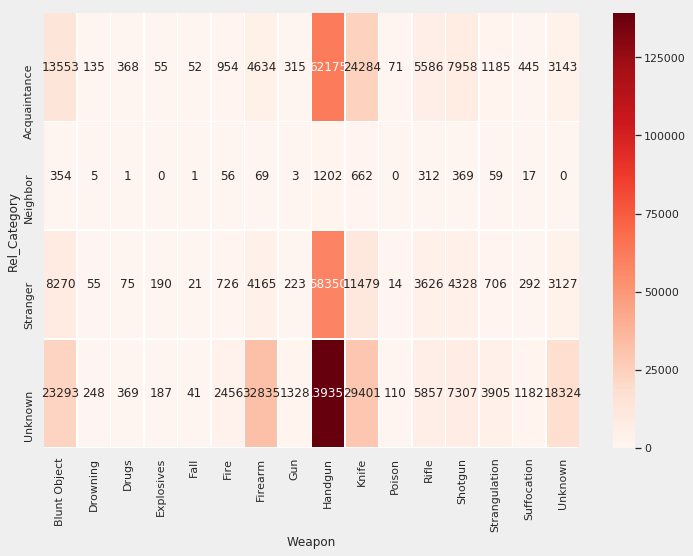

In [165]:
#heatmap relationship and weapon 
plt.figure(figsize=(12,8),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.Rel_Category,homicide.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')

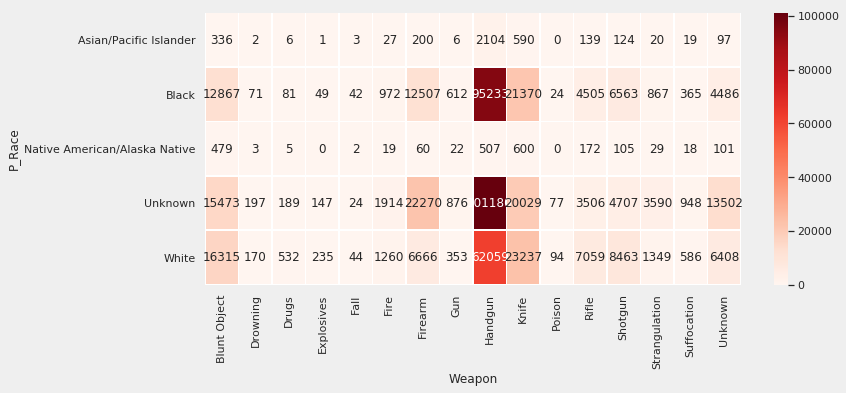

In [166]:
#heatmap for race and weapon 
plt.figure(figsize=(12,5),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.P_Race,homicide.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')

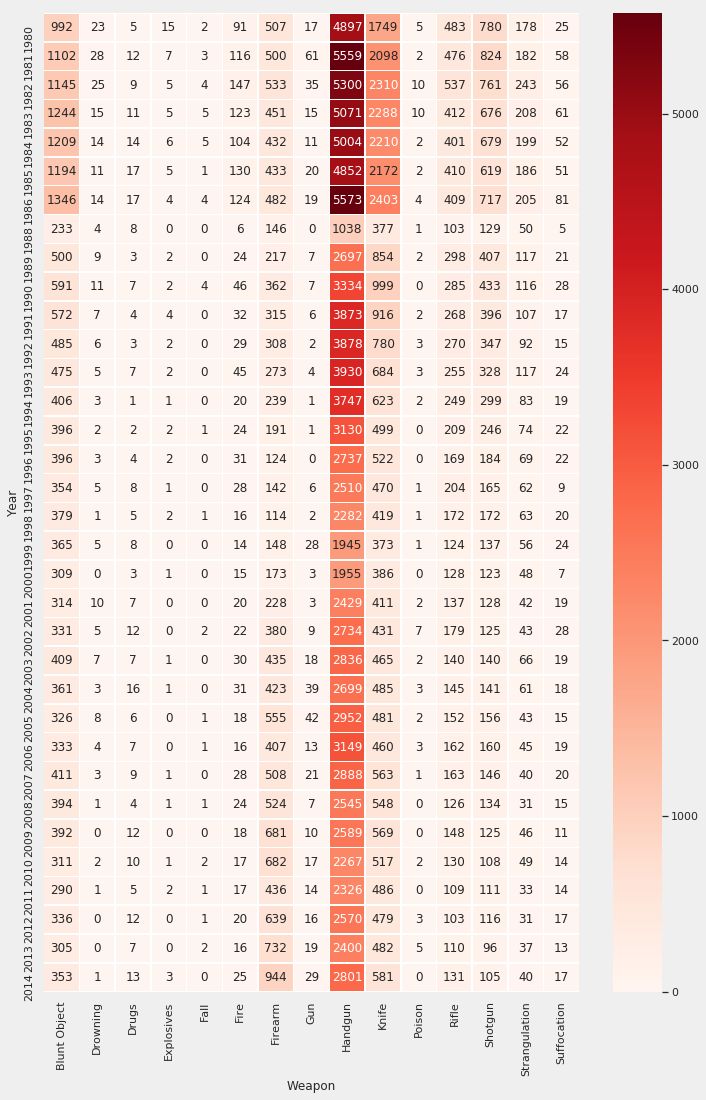

In [0]:
# heatmap for year and weapon 
plt.figure(figsize=(12,18),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.Year,homicide.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')

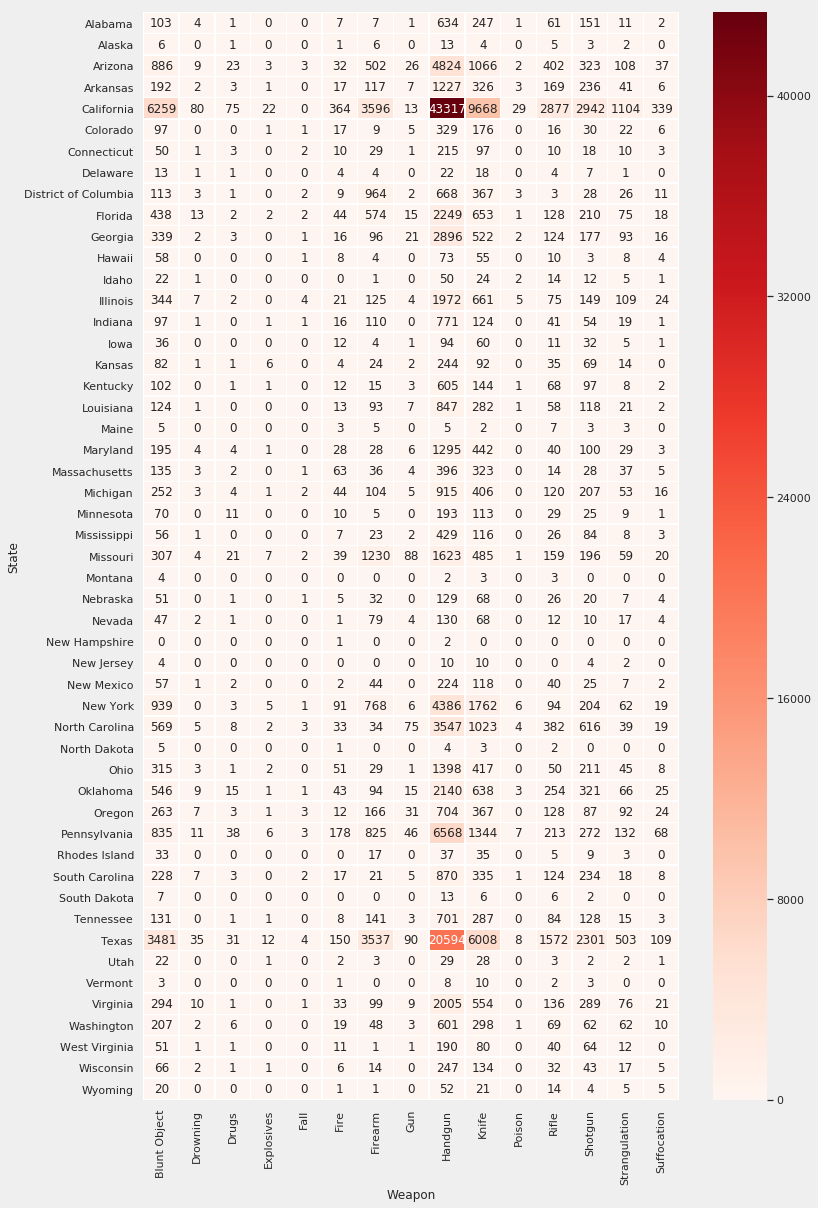

In [0]:
#heatmap for state and weapon 
plt.figure(figsize=(12,20),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.State,homicide.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')

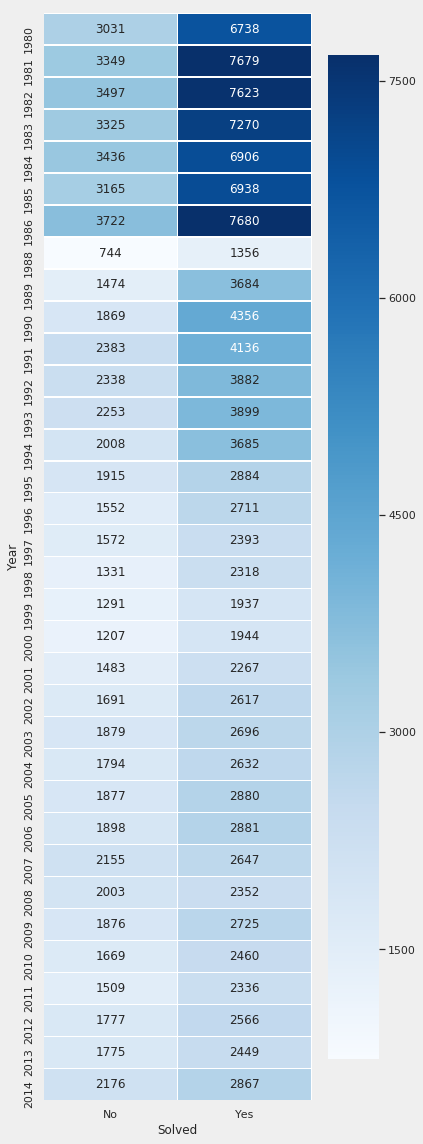

In [0]:
#heatmap for year and solved 
plt.figure(figsize=(6,20),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.Year,homicide.Solved), annot=True, fmt="d", linewidths=.5,cmap='Blues')

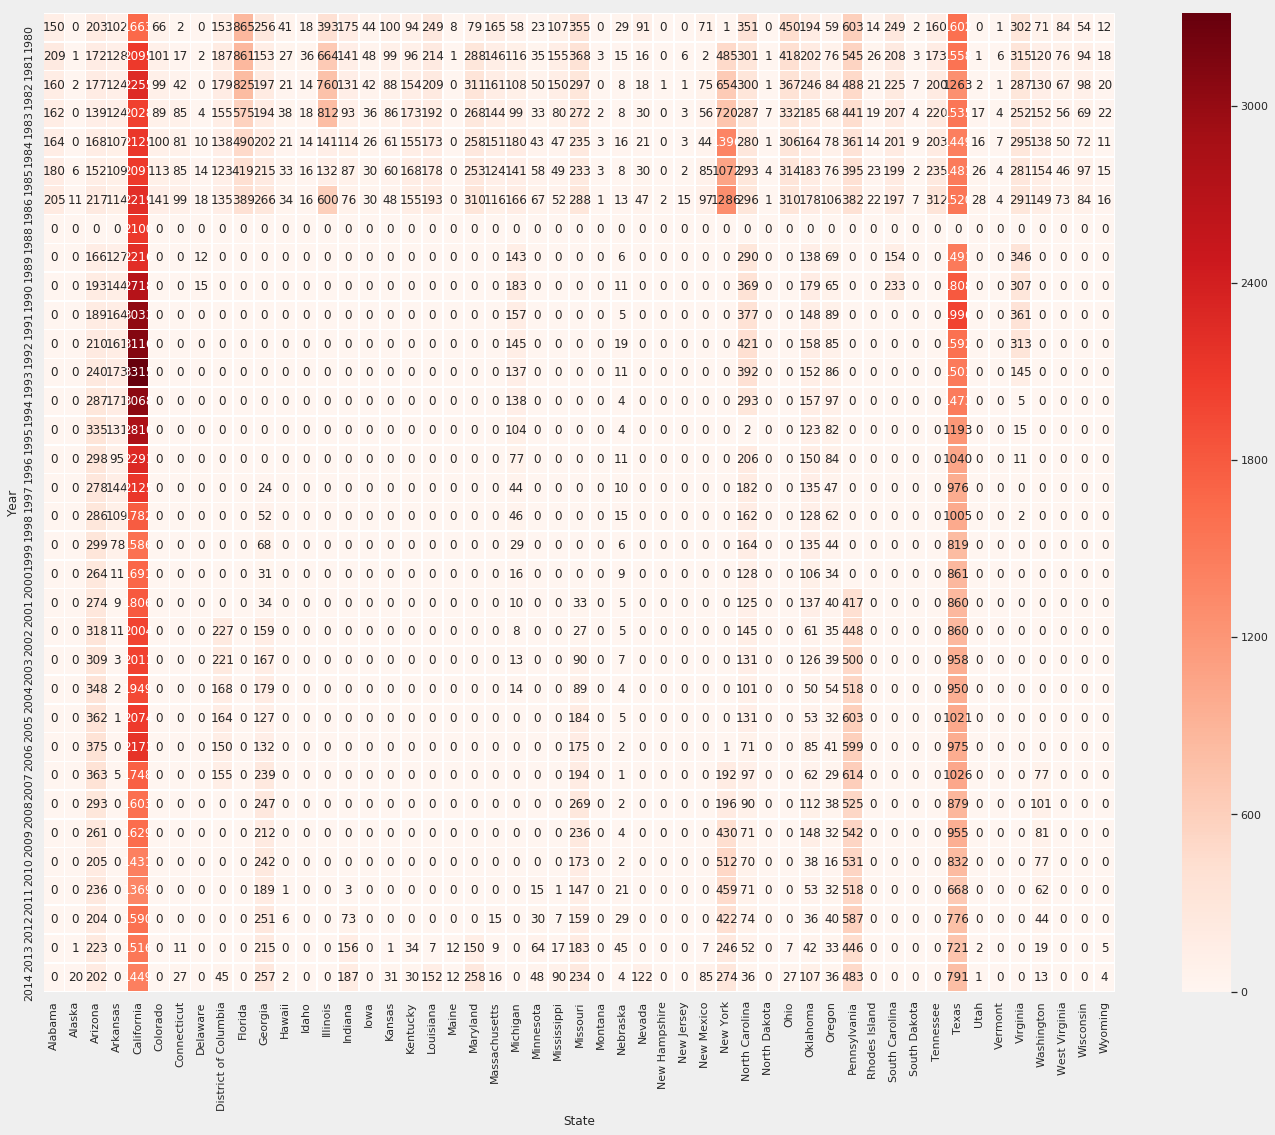

In [0]:
#heatmap for year and state
plt.figure(figsize=(24,18),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.Year,homicide.State), annot=True, fmt="d", linewidths=.5,cmap='Reds')

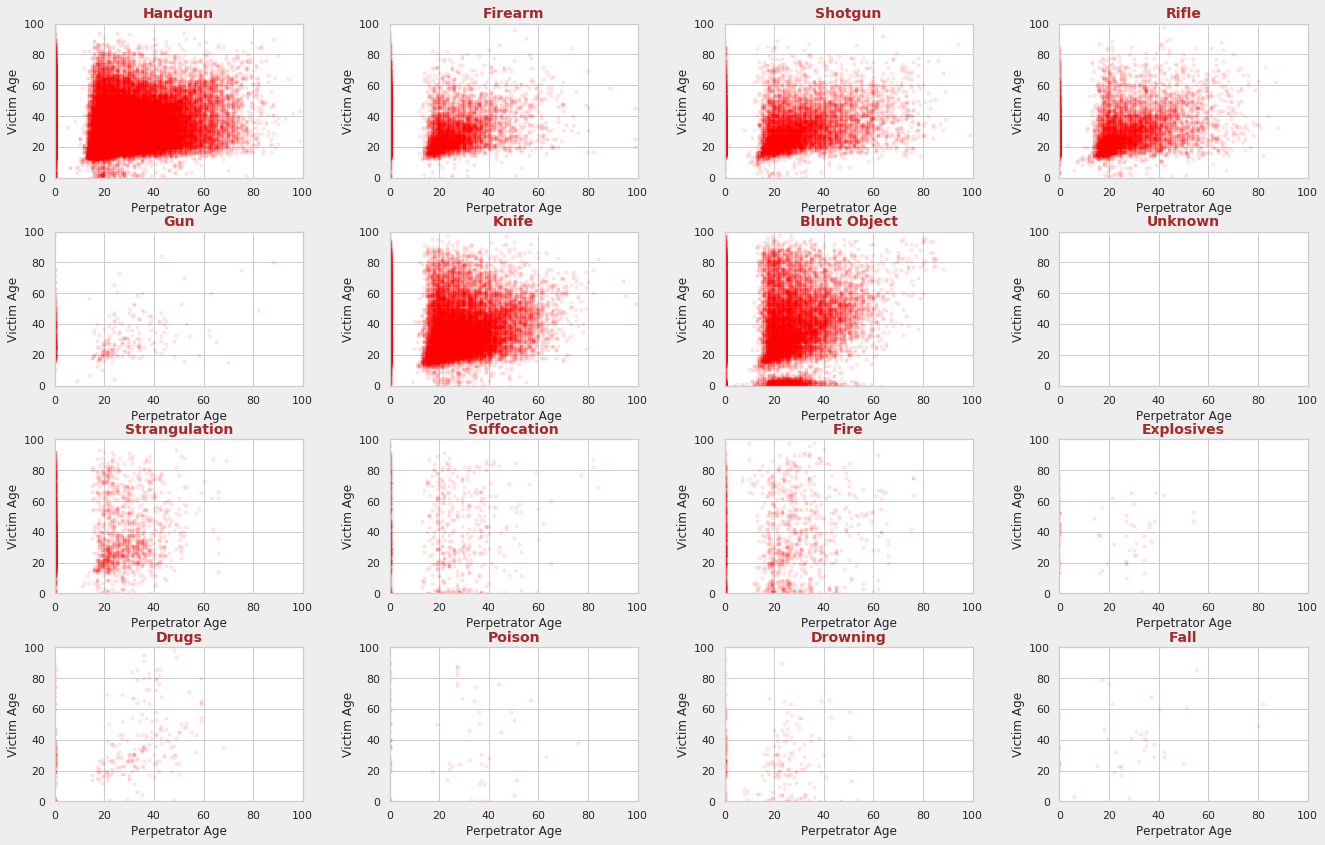

In [0]:
#scatter plot by weapons

sns.set_style('whitegrid')
plt.figure(figsize=(12,12),facecolor='#eeeeee')
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.35,wspace=.35)
homicide = homicide[(homicide.Victim_Age != ' ') & (homicide.Perpetrator_Age != ' ')]
W = ['Handgun', 'Firearm', 'Shotgun', 'Rifle', 'Gun','Knife','Blunt Object','Unknown','Strangulation','Suffocation','Fire','Explosives','Drugs','Poison','Drowning','Fall']
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title(W[i],fontsize=14,fontweight='bold',color='brown')
    plt.ylim([0,100])
    plt.xlim([0,100])
    plt.scatter(homicide[homicide.Weapon == W[i]].Perpetrator_Age,homicide[homicide.Weapon == W[i]].Victim_Age, marker='o',s=10, c='red', alpha=0.08)
    plt.ylabel('Victim Age')
    plt.xlabel('Perpetrator Age')

plt.show()

In [0]:
#State with the highest amount of historical homicide crimes

hdata.groupby(["State"]).size().reset_index(name="Count").sort_values(by='Count', ascending=False)


,State,Count
4,California,70685
43,Texas,38435
38,Pennsylvania,10546
32,New York,8346
2,Arizona,8246
33,North Carolina,6359
9,Florida,4424
10,Georgia,4308
25,Missouri,4241
36,Oklahoma,4172


In [0]:
#State with the highest Crime Type 'Murder or Manslaughter'
temp1 = hdata.loc[(hdata['Crime Type'] != 'Manslaughter by Negligence')]
temp1.groupby(["State"]).size().reset_index(name="Count").sort_values(by='Count', ascending=False)

,State,Count
4,California,70541
43,Texas,38203
38,Pennsylvania,10499
32,New York,8339
2,Arizona,8160
33,North Carolina,6318
9,Florida,4380
10,Georgia,4286
25,Missouri,4217
36,Oklahoma,4116


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


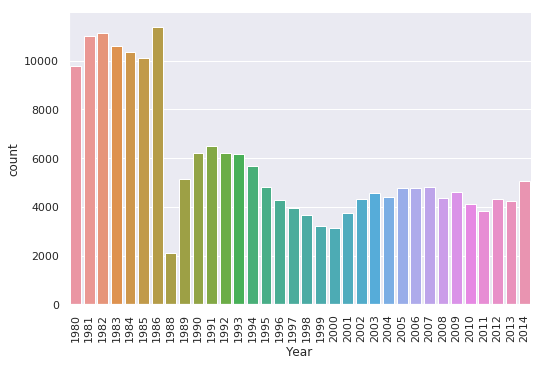

In [168]:
#Years with the highest amount of Homicide Crimes reported
g = sns.factorplot("Year", data=hdata, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


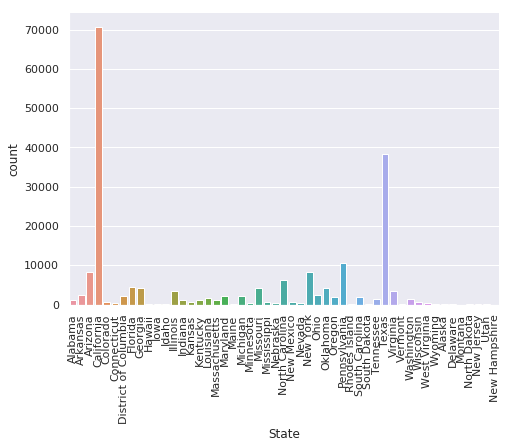

In [167]:
#Most Homicides pr state
g = sns.factorplot("State", data=hdata, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


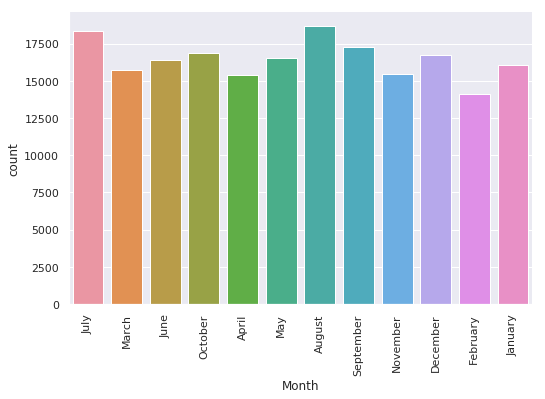

In [171]:
#Most Homicides pr month
g = sns.factorplot("Month", data=hdata, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

##Conclusions:


###1. What is the race, sex and/or age range combination most likely to commit 'Murder or Manslaughter'?

Answer: Black (15-35) Males and White (15-40) Males

###2. What is the race, sex and/or age range combination most likely to commit 'Manslaughter by Negligence'?

Answer: White (10-35) Males and Black (15-20) Males

###3. Which states are homicide crimes highest in?

Answer: California (Murder or Manslaughter - Highest) and Florida (Manslaughter by Negligence)

###4. Which weapon would males most likely use to commit homicide?

Answer: Handgun

###5. Which weapon would females most likely use to commit homicide?

Answer: Handgun

###6. What years were homicide crimes the highest in?

Answer: 1980-1981, 1990-1995 (theres a downtrend since )

###7. What is the typical female victim's age?

Answer: 0-5 years old

###8. What is the typical male victim's age?

Answer: 0-5, 10-30 (Highest 15-20)

###9. The highest homicide crime count is between which two sexes?

Answer: Male and Male

###10. Which ethnicity is most likely a victim of homicide?

Answer: Not Hispanic (Excluding Unknown)

###11. Are we more likely to see homicide crimes between same or different ethnicities?

Answer: Same ethnicities (Highest is Not Hispanic x Not Hispanic)

###12. Homicide crimes are highest during what months of the year?

Answer: Most homicides occurred during July-August.

###Special Speculations:

1. homicide crimes are more likely to occur between males of the same race.

2. a homicide crime is more likely to occur between the same race. Highest occurrences of homicides are between Whites and a close second is between Blacks.

